In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/mbusch/OneDrive - Regis University/MSDS/680/Week_5/texture.dat', skiprows=45)

In [3]:
features = ['A' + str(x) for x in range(1,41)]
df.columns = features + ["Class"]

In [4]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31',
       'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'Class'],
      dtype='object')

In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,2
1,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,2
2,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,2
3,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,2
4,-1.049,-0.632,-0.607,-0.469,-0.381,-0.315,-0.557,-0.403,-0.353,-0.566,...,-0.647,-0.436,-0.650,-0.452,-0.530,-0.835,-0.564,-0.537,-0.582,2


In [6]:
feature_vals = df[features].values
target = df['Class'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature_vals, target, test_size=0.2, random_state=42)

In [8]:
# force to use CPU for testing
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# from keras.utils import to_categorical
# from keras.models import Model
# from keras.layers import Input, Dense, Dropout, BatchNormalization
# import keras.backend as K

from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/Users/mbusch/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
# model = Sequential()

In [10]:
feature_vals.shape

(5499, 40)

In [12]:
# restart keras session (clear weights), sometimes this will clear up errors
K.clear_session()

# Input - Layer

# model.add(Dense(50, input_shape=(feature_vals.shape[1], )))

# # Hidden - Layers
# model.add(Dropout(0.3))
# model.add(Dense(50, activation = "relu"))
# model.add(Dropout(0.2))
# model.add(Dense(50, activation = "relu"))

# # Output- Layer
# model.add(Dense(1, activation = "sigmoid"))

# model.summary()

# functional API
inputs = Input(shape=(feature_vals.shape[1], ))
x1 = Dense(10, activation='elu')(inputs)
x2 = BatchNormalization()(x1)
x3 = Dropout(0.5)(x2)
x = Dense(1, activation='linear')(x3)

In [13]:
# model.compile(
#  optimizer = "adam",
#  loss = "binary_crossentropy",
#  metrics = ["accuracy"]
# )

# this compiles our model so it is ready to fit
model = Model(inputs, x)
model.compile(optimizer='adam', loss='mse')

In [14]:
# results = model.fit(
#  X_train, y_train,
#  epochs= 2,
#  batch_size = 500,
#  validation_data = (X_test, y_test)
# )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                410       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 461
Trainable params: 441
Non-trainable params: 20
_________________________________________________________________


In [15]:
X_train.shape

(4399, 40)

In [16]:
# this can be used to select only a small amount of data
# trainsize is the full training size
subset_size = X_train.shape[0]
train_feature_subset = X_train[:subset_size]
train_target_subset = y_train[:subset_size]
# we actually fit the model here
history = model.fit(train_feature_subset,
                    train_target_subset,
                    epochs=500,
                    validation_split=0.15,
                    batch_size=1000)

Train on 3739 samples, validate on 660 samples
Epoch 1/500
3739/3739 [==============================] - 0s 132us/step - loss: 80.7985 - val_loss: 76.6178
Epoch 2/500
3739/3739 [==============================] - 0s 3us/step - loss: 80.3918 - val_loss: 73.9695
Epoch 3/500
3739/3739 [==============================] - 0s 3us/step - loss: 78.9724 - val_loss: 70.6109
Epoch 4/500
3739/3739 [==============================] - 0s 3us/step - loss: 78.7548 - val_loss: 67.1083
Epoch 5/500
3739/3739 [==============================] - 0s 3us/step - loss: 77.4281 - val_loss: 63.9416
Epoch 6/500
3739/3739 [==============================] - 0s 3us/step - loss: 77.0746 - val_loss: 60.8546
Epoch 7/500
3739/3739 [==============================] - 0s 3us/step - loss: 75.9070 - val_loss: 58.8115
Epoch 8/500
3739/3739 [==============================] - 0s 3us/step - loss: 76.2058 - val_loss: 59.0599
Epoch 9/500
3739/3739 [==============================] - 0s 3us/step - loss: 74.8353 - val_loss: 62.9503
Epoch 

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

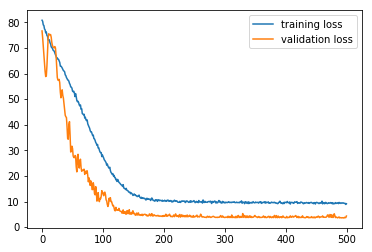

In [19]:
# check losses for overfitting and performance
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [20]:
past_preds = model.predict(X_train)[:, 0]
future_preds = model.predict(X_test)[:, 0]

In [23]:
from sklearn.metrics import r2_score
import altair as alt
# import numpy as np

In [41]:
preds = np.round(future_preds).astype(int)
results_df = pd.DataFrame({'Class':y_test.astype(int), 'Prediction':preds})
results_df.head()

,Class,Prediction
0,13,12
1,4,3
2,14,13
3,13,10
4,9,7


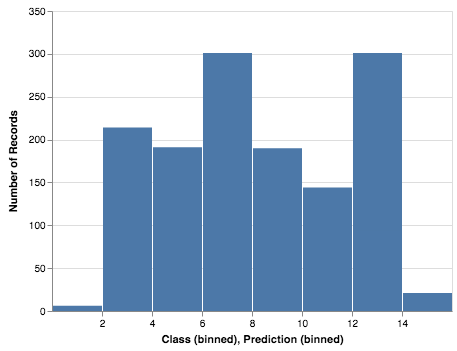

In [53]:
true = alt.Chart(results_df).mark_bar().encode(
x = alt.X('Class', bin = True),
    y = 'count()'
)

pred = alt.Chart(results_df).mark_bar().encode(
x = alt.X('Prediction', bin = True),
    y = 'count()'
)

alt.layer(
    true,
    pred
)

0.0
0.7194305265776184


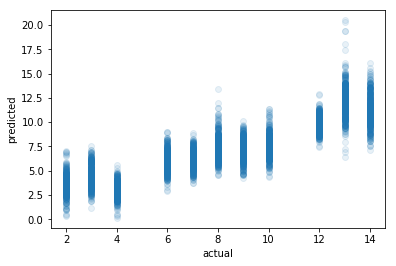

In [20]:
# our benchmark is just guessing the average
benchmark = np.mean(y_train)
print(r2_score(y_train, [benchmark] * y_train.shape[0]))

print(r2_score(y_train, past_preds))
plt.scatter(y_train, past_preds, alpha=0.1)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

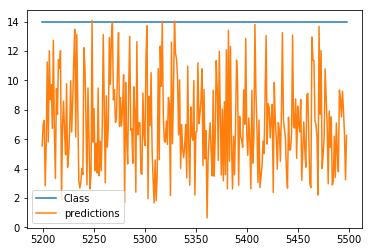

In [22]:
df['Class'].iloc[-300:].plot()
plt.plot(df.index[-300:], future_preds[-300:], label='predictions')
_ = plt.legend()